<a href="https://colab.research.google.com/github/weltonlopesdev/Arvore-de-decis-o-machine-learn-utilizando-python/blob/main/Arvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arvores de Decisao em I.A (machine learning)**

Árvores de decisão são métodos de aprendizado de máquinas supervisionado, muito utilizados em tarefas de classificação e regressão. 



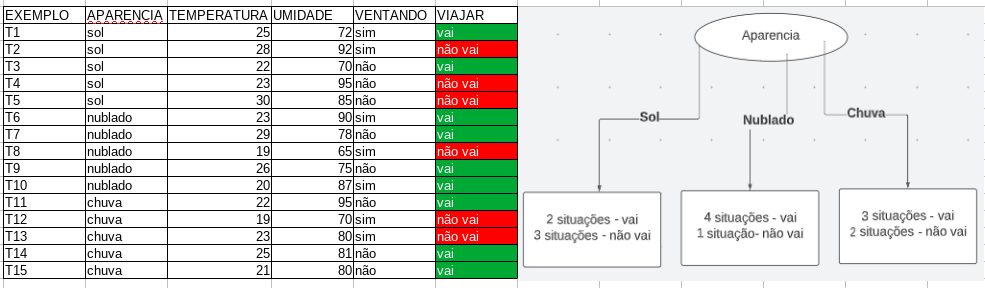

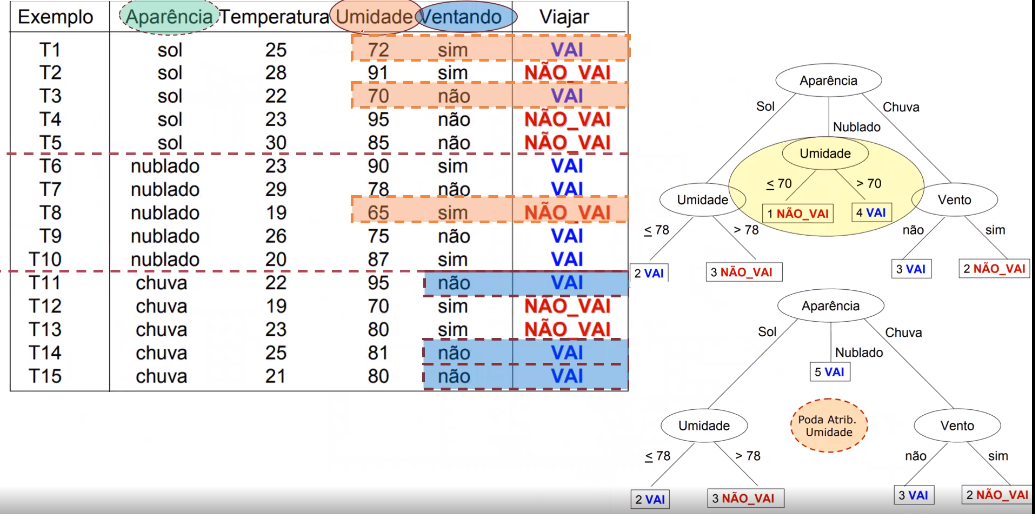

In [24]:
#import
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [5]:
#carregando a base
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
#criando o grupo de teste e treino

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)


In [8]:
#ajustando os dados de treinamento no modelo de arvore de decisão com profundidade máxima de 3

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [11]:
#relatório sobre a qualidade da classificação

print("\nMatriz de confusão detalhada:\n,", pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
, Predito   0   1   2  Todos
Real                      
0        12   0   0     12
1         0  12   2     14
2         0   0  12     12
Todos    12  12  14     38


In [25]:
print("\Relatório de qualidade:\n,")
print(classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virginia']))

\Relatório de qualidade:
,
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.86      0.92        14
    Virginia       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [26]:
#plotando o grafico usando grafics

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png")